In [1]:
import os
import meld
import numpy as np
import pandas as pd
import scanpy as sc
sc.set_figure_params()
import anndata as ad
import seaborn as sns

from collections import OrderedDict
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
### set params for meld
beta = 10  # amount of smoothing to apply
knn = 4  # number of neighbors to use

### SetAE Methods

#### FSPool + FSUPool

In [3]:
adata_fspool = ad.read_h5ad('../results/dl/covid19/fspool/latent.h5ad')

scaler = preprocessing.StandardScaler().fit(adata_fspool.X)
adata_fspool.X = scaler.transform(adata_fspool.X)

In [4]:
prob_density = meld.MELD(
    beta=beta, knn=knn, sample_normalize=True
).fit_transform(adata_fspool.X, adata_fspool.obs['phenotype'].values)
prob_fspool = meld.utils.normalize_densities(prob_density)

Building graph on 49 samples and 8 features.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculating affinities...


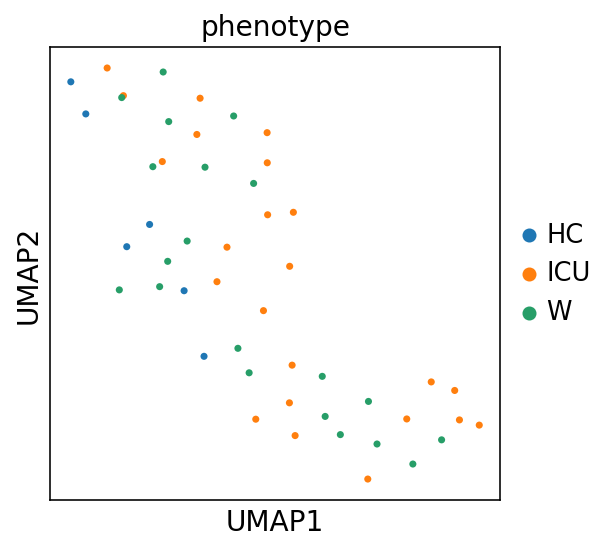

In [5]:
sc.pp.neighbors(adata_fspool, use_rep='X')
sc.tl.umap(adata_fspool)

with rc_context({'figure.figsize': (4, 4)}):
    fig, ax = plt.subplots(1, 1)
    sc.pl.umap(
        adata_fspool,
        color='phenotype',
        size=50,
        frameon=True,
        ax=ax
    )

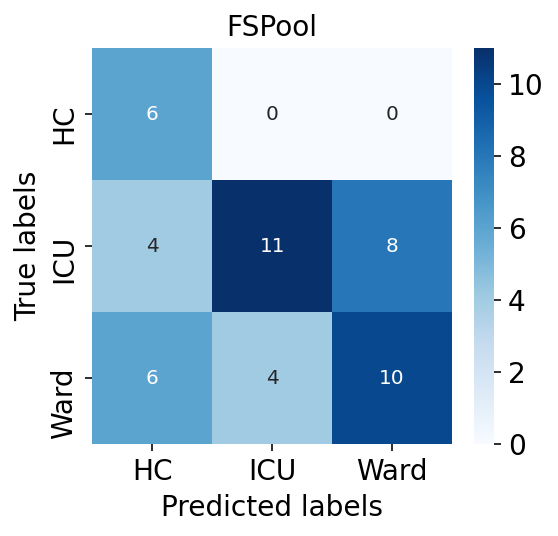

In [6]:
# plot confusion matrix
pred_label = prob_fspool.idxmax(axis=1).tolist()
sample_label = np.array(adata_fspool.obs['phenotype'].tolist())

cm = confusion_matrix(sample_label, pred_label)
f1_fspool = metrics.f1_score(sample_label, pred_label, average='weighted', labels=['HC', 'ICU', 'W'])

fig, ax = plt.subplots(1, 1, figsize=(4, 3.5))

sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('FSPool')
ax.xaxis.set_ticklabels(['HC', 'ICU', 'Ward']);
ax.yaxis.set_ticklabels(['HC', 'ICU', 'Ward']);

#### Max + MLP

In [7]:
adata_maxmlp = ad.read_h5ad('../results/dl/covid19/max_mlp/latent.h5ad')

scaler = preprocessing.StandardScaler().fit(adata_maxmlp.X)
adata_maxmlp.X = scaler.transform(adata_maxmlp.X)

In [8]:
prob_density = meld.MELD(
    beta=beta, knn=knn, sample_normalize=True
).fit_transform(adata_maxmlp.X, adata_maxmlp.obs['phenotype'].values)
prob_maxmlp = meld.utils.normalize_densities(prob_density)

Building graph on 49 samples and 8 features.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculating affinities...


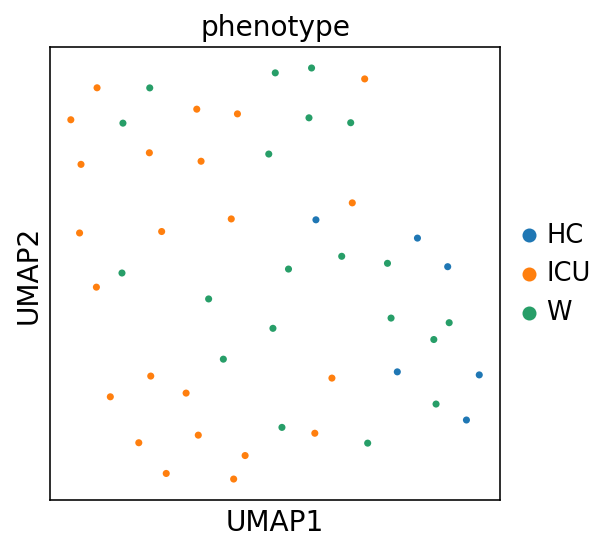

In [9]:
sc.pp.neighbors(adata_maxmlp, use_rep='X')
sc.tl.umap(adata_maxmlp)

with rc_context({'figure.figsize': (4, 4)}):
    fig, ax = plt.subplots(1, 1)
    sc.pl.umap(
        adata_maxmlp,
        color='phenotype',
        size=50,
        frameon=True,
        ax=ax
    )

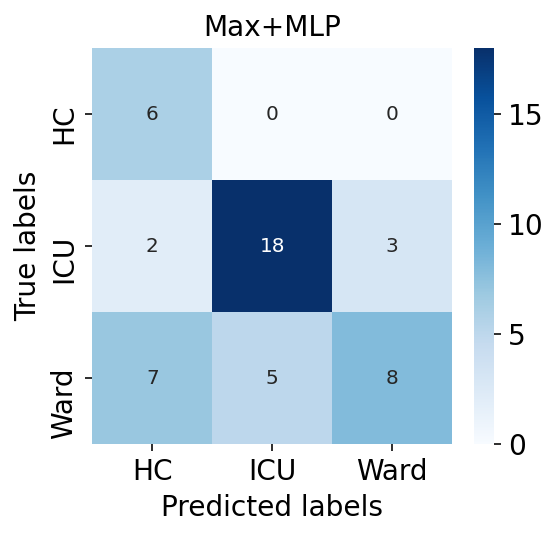

In [10]:
# plot confusion matrix
pred_label = prob_maxmlp.idxmax(axis=1).tolist()
sample_label = np.array(adata_maxmlp.obs['phenotype'].tolist())

cm = confusion_matrix(sample_label, pred_label)
f1_maxmlp = metrics.f1_score(sample_label, pred_label, average='weighted', labels=['HC', 'ICU', 'W'])

fig, ax = plt.subplots(1, 1, figsize=(4, 3.5))

sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Max+MLP')
ax.xaxis.set_ticklabels(['HC', 'ICU', 'Ward']);
ax.yaxis.set_ticklabels(['HC', 'ICU', 'Ward']);

#### Mean + MLP

In [11]:
adata_meanmlp = ad.read_h5ad('../results/dl/covid19/mean_mlp/latent.h5ad')

scaler = preprocessing.StandardScaler().fit(adata_meanmlp.X)
adata_meanmlp.X = scaler.transform(adata_meanmlp.X)

In [12]:
prob_density = meld.MELD(
    beta=beta, knn=knn, sample_normalize=True
).fit_transform(adata_meanmlp.X, adata_meanmlp.obs['phenotype'].values)
prob_meanmlp = meld.utils.normalize_densities(prob_density)

Building graph on 49 samples and 8 features.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculating affinities...


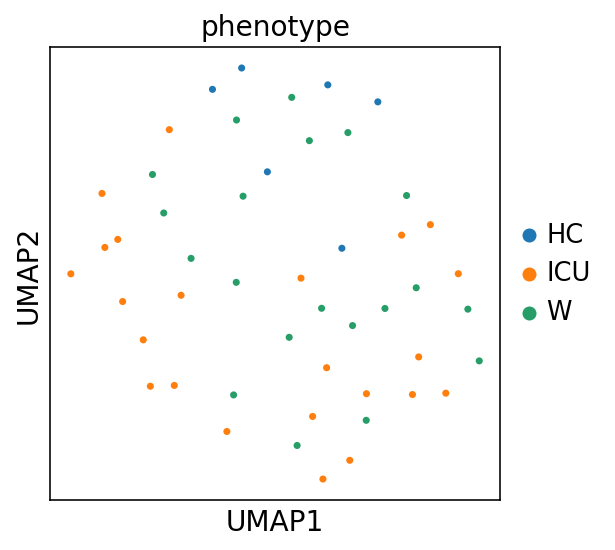

In [13]:
sc.pp.neighbors(adata_meanmlp, use_rep='X')
sc.tl.umap(adata_meanmlp)

with rc_context({'figure.figsize': (4, 4)}):
    fig, ax = plt.subplots(1, 1)
    sc.pl.umap(
        adata_meanmlp,
        color='phenotype',
        size=50,
        frameon=True,
        ax=ax
    )

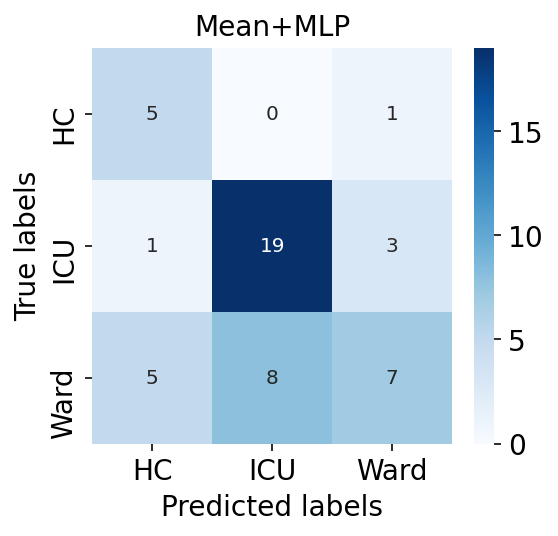

In [14]:
# plot confusion matrix
pred_label = prob_meanmlp.idxmax(axis=1).tolist()
sample_label = np.array(adata_meanmlp.obs['phenotype'].tolist())

cm = confusion_matrix(sample_label, pred_label)
f1_meanmlp = metrics.f1_score(sample_label, pred_label, average='weighted', labels=['HC', 'ICU', 'W'])

fig, ax = plt.subplots(1, 1, figsize=(4, 3.5))

sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Mean+MLP')
ax.xaxis.set_ticklabels(['HC', 'ICU', 'Ward']);
ax.yaxis.set_ticklabels(['HC', 'ICU', 'Ward']);

### CytoEMD Method

In [15]:
adata_cytoemd = ad.read_h5ad("../results/covid19_cytoemd.h5ad")
scaler = preprocessing.StandardScaler().fit(adata_cytoemd.X)
adata_cytoemd.X = scaler.transform(adata_cytoemd.X)

### get predicted probability
prob_density = meld.MELD(
    beta=beta, knn=knn, sample_normalize=True
).fit_transform(adata_cytoemd.X, adata_cytoemd.obs['phenotype'].values)
prob_cytoemd = meld.utils.normalize_densities(prob_density)

Building graph on 49 samples and 2 features.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculating affinities...


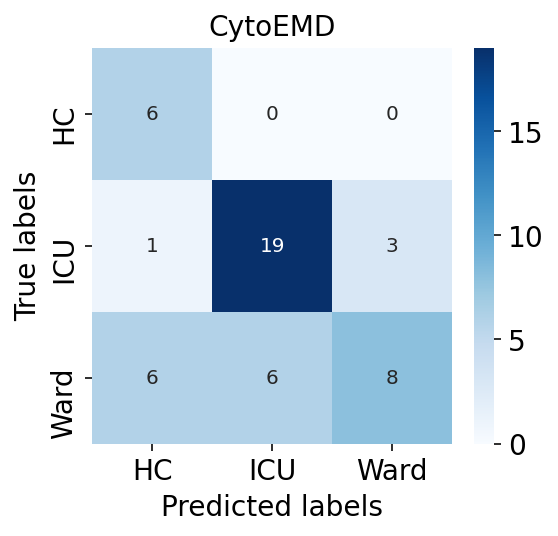

In [16]:
pred_label = prob_cytoemd.idxmax(axis=1).tolist()
sample_label = np.array(adata_cytoemd.obs['phenotype'].tolist())

cm = confusion_matrix(sample_label, pred_label)
f1_cytoemd = metrics.f1_score(sample_label, pred_label, average='weighted', labels=['HC', 'ICU', 'W'])

fig, ax = plt.subplots(1, 1, figsize=(4, 3.5))

sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('CytoEMD')
ax.xaxis.set_ticklabels(['HC', 'ICU', 'Ward']);
ax.yaxis.set_ticklabels(['HC', 'ICU', 'Ward']);

### F1 Score of Different Methods

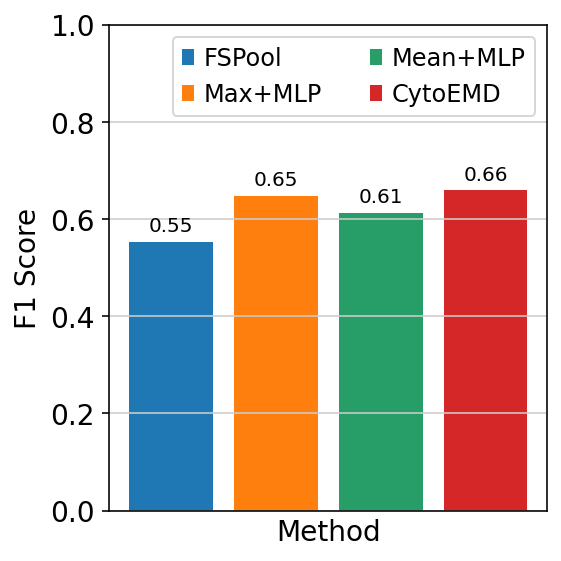

In [17]:
### AUC Barplot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

labels = ['FSPool', 'Max+MLP', 'Mean+MLP', 'CytoEMD']
width = 0.8
x = np.arange(4)

rec1 = ax.bar(x[0], f1_fspool,  label=labels[0], )
rec2 = ax.bar(x[1], f1_maxmlp,  label=labels[1], )
rec3 = ax.bar(x[2], f1_meanmlp, label=labels[2], )
rec4 = ax.bar(x[3], f1_cytoemd, label=labels[3], )

ax.set_ylim([0, 1])
ax.set_xlabel("Method")
ax.set_ylabel("F1 Score")
# ax.set_title("AUC of Different Methods")
ax.set_xticks([])
# ax.set_xticklabels(labels, rotation=45, fontsize=8)
ax.grid(':')
ax.legend(loc='best', ncol=2, fontsize=12)
# ax.set_title("F1 Score of Different Methods")

ax.bar_label(rec1, fmt="%.2f", padding=3)
ax.bar_label(rec2, fmt="%.2f", padding=3)
ax.bar_label(rec3, fmt="%.2f", padding=3)
ax.bar_label(rec4, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()

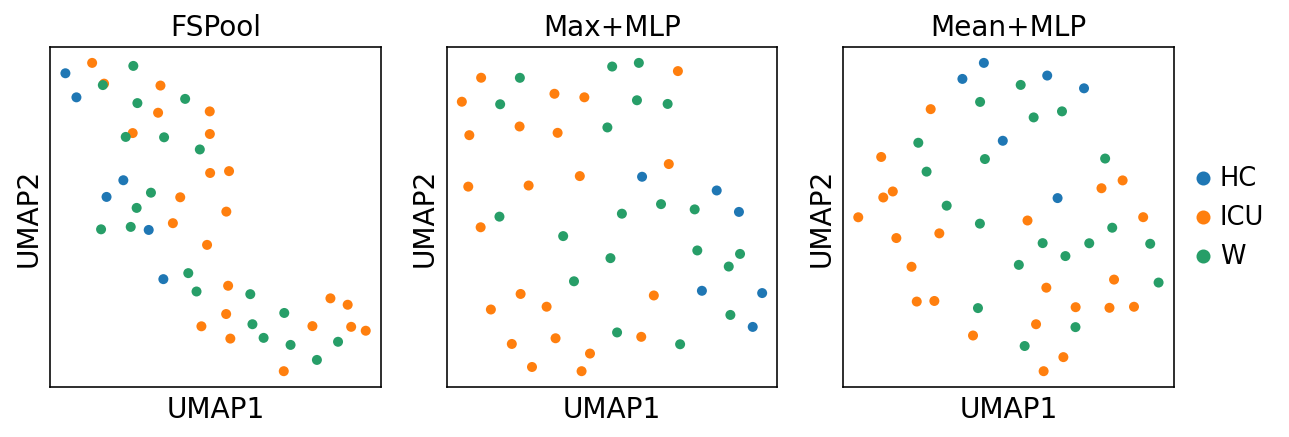

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

ax1_dict = sc.pl.umap(adata_fspool,  color='phenotype', size=100, show=False, ax=ax1, title='FSPool', legend_loc=None)
ax2_dict = sc.pl.umap(adata_maxmlp,  color='phenotype', size=100, show=False, ax=ax2, title='Max+MLP', legend_loc=None)
ax3_dict = sc.pl.umap(adata_meanmlp, color='phenotype', size=100, show=False, ax=ax3, title='Mean+MLP')